<a href="https://colab.research.google.com/github/Askoye/Mchezopesa-Ltd-IP-Week-6---Ted-Askoye/blob/master/Moringa_Data_Science_Core_W6_Independent_Project_2020_07_Ted_Askoye_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mchezopesa Limited(Ltd.)

## 1. Defining the Question

### a) Specifying the Question

Research Question.

We will
- Predict how many goals the home team scores.
- Predict how many goals the away team scores.
- Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

We will do this using two approaches 

Approach 1: Using Polynomial regression.
Create a model that can predict how many goals the home team scores 

Approach 2: Using Logistic Regression.
Create a model that can predict whether the home team will win, draw or lose

This will be done by using the following:
- Home team
- Away team 
- Tournament type 
- Rank of home and away teams

### b) Defining the Metric for Success

The metric of success for the first approach (Polynomial regression) will be the Root Mean Squared Error which we will be using to measure the performace of the model. 

The metric of success for the second approach (Logistic Regression) will be measured using the accuracy score and the f1_score in order to find its predictive power

### c) Understanding the context 

A more detailed explanation and history of the rankings is available here: [Click the link for more info.](https://https://en.wikipedia.org/wiki/FIFA_World_Rankings) 

An explanation of the ranking procedure is available here: [Click the link for more info.](https://https://www.fifa.com/fifa-world-ranking/procedure/men)



### d) Recording the Experimental Design

> Expected flow for the assessment:

- Perform our EDA
- Perform any necessary feature engineering 
- Check of multicollinearity
- Start building the model
- Cross-validate the model
- Compute RMSE
- Create residual plots for our models, and assess the heteroscedasticity using Bartlett’s test
- Perform appropriate regressions on the data including our justification
- Challenge the solution by providing insights on how to can make improvements.

### e) Data Relevance

## 2. Reading the Data

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Loading and previewing the data of the fifa_ranking_df

fifa_ranking_df = pd.read_csv('fifa_ranking.csv')
fifa_ranking_df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
# Previewing some information of the fifa_ranking_df

fifa_ranking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [ ]:
# Previewing some statistical summaries of the fifa_ranking_df

fifa_ranking_df.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [ ]:
# Checking for missing values of the fifa_ranking_df

fifa_ranking_df.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [ ]:
# Checking for duplicates

fifa_ranking_df.duplicated().any()

True

In [ ]:
# Removing duplicates

fifa_ranking_df.drop_duplicates(keep='first', inplace = True)

In [ ]:
# Checking whether the duplicates have been removed

fifa_ranking_df.duplicated().any()

False

In [ ]:
# Loading and previewing the results_df

results_df = pd.read_csv('results.csv')
results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
# Previewing information of the results_df

results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [ ]:
# Previewing statistical summaries of the results_df

results_df.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [ ]:
# Checking for missing values of the results_df

results_df.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [ ]:
# Checking for duplicates

results_df.duplicated().any()

False

### Tidying the Dataset

In [ ]:
# Renaming the rank_date column

fifa_ranking_df.rank_date = fifa_ranking_df.rename({'rank_date': 'date'}, axis = 1, inplace = True)

In [ ]:
# Making the date columns uniform

results_df.date = results_df.date.apply(lambda x: x.replace('/', '-'))
fifa_ranking_df.date = fifa_ranking_df.date.apply(lambda x: x.replace('/', '-'))

In [ ]:
# Changing the date columns to datetime 

fifa_ranking_df.date = pd.to_datetime(fifa_ranking_df.date)
results_df.date = pd.to_datetime(results_df.date)

In [ ]:
# Creating a year and month column from datetime 

fifa_ranking_df['year'] = fifa_ranking_df.date.dt.year
results_df['year'] = results_df.date.dt.year

fifa_ranking_df['month'] = fifa_ranking_df.date.dt.month
results_df['month'] = fifa_ranking_df.date.dt.month

In [ ]:
# Checking the unique years in the fifa_ranking_df

fifa_ranking_df.year.unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [ ]:
# Checking the unique years in the results_df

results_df.year.unique()

array([1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

In [ ]:
# Merging results_df to the fifa_ranking_df on both year and month

merged_df = pd.merge(results_df, fifa_ranking_df, how = 'left', left_on = ['year', 'month'], right_on = ['year', 'month'])

In [ ]:
# Previewing the merged_df 

merged_df.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_y
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [ ]:
# Selecting the ranking details of the home team only

home_merged_df = merged_df[merged_df.home_team == merged_df.country_full]

In [ ]:
# Previewing the home_combined dataframe

home_merged_df.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_y
18192,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,Barbados,BRB,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1994-04-19
18291,1994-01-02,Ghana,Egypt,2,1,Friendly,Accra,Ghana,False,1994,4,29.0,Ghana,GHA,0.0,41.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18479,1994-01-05,Mali,Burkina Faso,1,1,Friendly,Bamako,Mali,False,1994,4,48.0,Mali,MLI,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18747,1994-01-09,Mauritania,Mali,1,3,Friendly,Nouakchott,Mauritania,False,1994,4,147.0,Mauritania,MTN,0.0,3.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18838,1994-01-11,Thailand,Nigeria,1,1,Friendly,Bangkok,Thailand,False,1994,4,69.0,Thailand,THA,0.0,25.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AFC,1994-04-19


In [ ]:
# Renaming the selected home_combined columns 

home_merged_df.columns = map(str.lower, home_merged_df.columns)
columns = ['date_x','home_team','away_team','home_score','away_score','tournament','city','country','neutral','year','month','rank_home','country_full_home',	
           'country_abrv_home','total_points_home','previous_points_home','rank_change_home','cur_year_avg_home','cur_year_avg_weighted_home','last_year_avg_home','last_year_avg_weighted_home',
           'two_year_ago_avg_home','two_year_ago_weighted_home','three_year_ago_avg_home','three_year_ago_weighted_home','confederation','date_y']

home_merged_df.columns = columns

In [ ]:
# Previewing the renamed columns
home_merged_df.columns

Index(['date_x', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month',
       'rank_home', 'country_full_home', 'country_abrv_home',
       'total_points_home', 'previous_points_home', 'rank_change_home',
       'cur_year_avg_home', 'cur_year_avg_weighted_home', 'last_year_avg_home',
       'last_year_avg_weighted_home', 'two_year_ago_avg_home',
       'two_year_ago_weighted_home', 'three_year_ago_avg_home',
       'three_year_ago_weighted_home', 'confederation', 'date_y'],
      dtype='object')

In [ ]:
# Selecting the ranking details of the away team

away_merged_df = merged_df[merged_df.away_team == merged_df.country_full]

In [ ]:
# Previewing the records of the away_combined dataframe

away_merged_df.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_y
18224,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,131.0,Grenada,GRN,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1994-04-19
18286,1994-01-02,Ghana,Egypt,2,1,Friendly,Accra,Ghana,False,1994,4,24.0,Egypt,EGY,0.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18532,1994-01-05,Mali,Burkina Faso,1,1,Friendly,Bamako,Mali,False,1994,4,101.0,Burkina Faso,BFA,0.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18648,1994-01-09,Mauritania,Mali,1,3,Friendly,Nouakchott,Mauritania,False,1994,4,48.0,Mali,MLI,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18774,1994-01-11,Thailand,Nigeria,1,1,Friendly,Bangkok,Thailand,False,1994,4,5.0,Nigeria,NGA,0.0,49.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19


In [ ]:
# Renaming the columns in the away_combined dataframe

away_merged_df.columns

Index(['date_x', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month', 'rank',
       'country_full', 'country_abrv', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'date_y'],
      dtype='object')

In [ ]:
# Renaming the selected home_merged_df columns 

away_merged_df.columns = map(str.lower, away_merged_df.columns)
columns = ['date_x','home_team','away_team','home_score','away_score','tournament','city','country','neutral','year','month','rank_away','country_full_away',	
           'country_abrv_away','total_points_away','previous_points_away','rank_change_away','cur_year_avg_away','cur_year_avg_weighted_away','last_year_avg_away','last_year_avg_weighted_away',
           'two_year_ago_avg_away','two_year_ago_weighted_away','three_year_ago_avg_away','three_year_ago_weighted_away','confederation','date_y']
away_merged_df.columns = columns

In [ ]:
# Previewing the renamed columns

away_merged_df.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank_away,country_full_away,country_abrv_away,total_points_away,previous_points_away,rank_change_away,cur_year_avg_away,cur_year_avg_weighted_away,last_year_avg_away,last_year_avg_weighted_away,two_year_ago_avg_away,two_year_ago_weighted_away,three_year_ago_avg_away,three_year_ago_weighted_away,confederation,date_y
18224,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,131.0,Grenada,GRN,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1994-04-19
18286,1994-01-02,Ghana,Egypt,2,1,Friendly,Accra,Ghana,False,1994,4,24.0,Egypt,EGY,0.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18532,1994-01-05,Mali,Burkina Faso,1,1,Friendly,Bamako,Mali,False,1994,4,101.0,Burkina Faso,BFA,0.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18648,1994-01-09,Mauritania,Mali,1,3,Friendly,Nouakchott,Mauritania,False,1994,4,48.0,Mali,MLI,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18774,1994-01-11,Thailand,Nigeria,1,1,Friendly,Bangkok,Thailand,False,1994,4,5.0,Nigeria,NGA,0.0,49.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19


In [ ]:
# Removing irrelevant columns from the away_merged_df by creating a list of columns to be dropped

away_merged_df.drop(['date_x','home_score','away_score','tournament','city','country','neutral','date_y','confederation'], axis = 1, inplace = True)


In [ ]:
# Previewing the away_combined dataset

away_merged_df.head()

,home_team,away_team,year,month,rank_away,country_full_away,country_abrv_away,total_points_away,previous_points_away,rank_change_away,cur_year_avg_away,cur_year_avg_weighted_away,last_year_avg_away,last_year_avg_weighted_away,two_year_ago_avg_away,two_year_ago_weighted_away,three_year_ago_avg_away,three_year_ago_weighted_away
18224,Barbados,Grenada,1994,4,131.0,Grenada,GRN,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18286,Ghana,Egypt,1994,4,24.0,Egypt,EGY,0.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18532,Mali,Burkina Faso,1994,4,101.0,Burkina Faso,BFA,0.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18648,Mauritania,Mali,1994,4,48.0,Mali,MLI,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18774,Thailand,Nigeria,1994,4,5.0,Nigeria,NGA,0.0,49.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Merging the home_combined dataframe to the away_combined dataframe
# The two dataframes have been merged on year, month, home_team and away_team columns

complete_merged_df = pd.merge(home_merged_df, away_merged_df, how = 'left' , left_on =['year', 'month', 'home_team', 'away_team'],\
                    right_on = ['year', 'month', 'home_team', 'away_team'])

In [ ]:
# Previewing the first five rows of the merged dataframe
complete_merged_df.head()

In [ ]:
# Removing irrelevant columns from the final dataframe

complete_merged_df.drop(['country_full_home', 'country_abrv_home', 'date_y', 'country_full_away',	'country_abrv_away'], axis = 1, inplace = True)

In [ ]:
# Checking for missing values

complete_merged_df.isnull().sum()

date_x                             0
home_team                          0
away_team                          0
home_score                         0
away_score                         0
tournament                         0
city                               0
country                            0
neutral                            0
year                               0
month                              0
rank_home                          0
total_points_home                  0
previous_points_home               0
rank_change_home                   0
cur_year_avg_home                  0
cur_year_avg_weighted_home         0
last_year_avg_home                 0
last_year_avg_weighted_home        0
two_year_ago_avg_home              0
two_year_ago_weighted_home         0
three_year_ago_avg_home            0
three_year_ago_weighted_home       0
confederation                      0
rank_away                       1811
total_points_away               1811
previous_points_away            1811
r

In [ ]:
# Dropping missing values

complete_merged_df.dropna(inplace=True)

In [ ]:
# Previewing the complete_merged_df dataframe

complete_merged_df.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank_home,total_points_home,previous_points_home,rank_change_home,cur_year_avg_home,cur_year_avg_weighted_home,last_year_avg_home,last_year_avg_weighted_home,two_year_ago_avg_home,two_year_ago_weighted_home,three_year_ago_avg_home,three_year_ago_weighted_home,confederation,rank_away,total_points_away,previous_points_away,rank_change_away,cur_year_avg_away,cur_year_avg_weighted_away,last_year_avg_away,last_year_avg_weighted_away,two_year_ago_avg_away,two_year_ago_weighted_away,three_year_ago_avg_away,three_year_ago_weighted_away
0,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,131.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,131.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1994-01-02,Ghana,Egypt,2,1,Friendly,Accra,Ghana,False,1994,4,29.0,0.0,41.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,24.0,0.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1994-01-05,Mali,Burkina Faso,1,1,Friendly,Bamako,Mali,False,1994,4,48.0,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,101.0,0.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1994-01-09,Mauritania,Mali,1,3,Friendly,Nouakchott,Mauritania,False,1994,4,147.0,0.0,3.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,48.0,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Checking the datatypes of the complete_merged_df 

complete_merged_df.dtypes

date_x                          datetime64[ns]
home_team                               object
away_team                               object
home_score                               int64
away_score                               int64
tournament                              object
city                                    object
country                                 object
neutral                                   bool
year                                     int64
month                                    int64
rank_home                              float64
total_points_home                      float64
previous_points_home                   float64
rank_change_home                       float64
cur_year_avg_home                      float64
cur_year_avg_weighted_home             float64
last_year_avg_home                     float64
last_year_avg_weighted_home            float64
two_year_ago_avg_home                  float64
two_year_ago_weighted_home             float64
three_year_ag

In [ ]:
# Changing the complete_merged_df datatypes to their appriopriate datatype

col = ['home_team', 'away_team', 'tournament', 'city', 'country', 'neutral', 'year', 'month']

complete_merged_df[col] = complete_merged_df[col].astype('category')

In [ ]:
complete_merged_df.dtypes

date_x                          datetime64[ns]
home_team                             category
away_team                             category
home_score                               int64
away_score                               int64
tournament                            category
city                                  category
country                               category
neutral                               category
year                                  category
month                                 category
rank_home                              float64
total_points_home                      float64
previous_points_home                   float64
rank_change_home                       float64
cur_year_avg_home                      float64
cur_year_avg_weighted_home             float64
last_year_avg_home                     float64
last_year_avg_weighted_home            float64
two_year_ago_avg_home                  float64
two_year_ago_weighted_home             float64
three_year_ag

In [ ]:
# Creating a new column showing the final result based on the home team
# The column has been created by subtracting the away score from the home score

complete_merged_df['score'] = complete_merged_df.home_score - complete_merged_df.away_score

In [ ]:
# Previewing the score column
#
complete_merged_df.score.head()

0    0
1    0
2    1
3    0
4   -2
Name: score, dtype: int64

In [ ]:
# Creating a function to generate the result to be used so as to create a win, draw or lose column based on the home team

def result(goals):
  if goals > 0:
    return 'Win'
  elif goals < 0:
    return 'Lose'
  else:
    return 'Draw'
# Applying the result function to the complete_merged_df

complete_merged_df['result'] = complete_merged_df.score.apply(lambda x: result(x))

# Dropping the score column

complete_merged_df.drop('score', axis = 1, inplace = True)

# Creating a column of total goals scored

complete_merged_df['total_goals'] = complete_merged_df.home_score + complete_merged_df.away_score

# Previewing the complete_merged_df together with the result column

complete_merged_df.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank_home,total_points_home,previous_points_home,rank_change_home,cur_year_avg_home,cur_year_avg_weighted_home,last_year_avg_home,last_year_avg_weighted_home,two_year_ago_avg_home,two_year_ago_weighted_home,three_year_ago_avg_home,three_year_ago_weighted_home,confederation,rank_away,total_points_away,previous_points_away,rank_change_away,cur_year_avg_away,cur_year_avg_weighted_away,last_year_avg_away,last_year_avg_weighted_away,two_year_ago_avg_away,two_year_ago_weighted_away,three_year_ago_avg_away,three_year_ago_weighted_away,result,total_goals
0,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,131.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Draw,0
1,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,131.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Draw,0
2,1994-01-02,Ghana,Egypt,2,1,Friendly,Accra,Ghana,False,1994,4,29.0,0.0,41.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,24.0,0.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Win,3
3,1994-01-05,Mali,Burkina Faso,1,1,Friendly,Bamako,Mali,False,1994,4,48.0,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,101.0,0.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Draw,2
4,1994-01-09,Mauritania,Mali,1,3,Friendly,Nouakchott,Mauritania,False,1994,4,147.0,0.0,3.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,48.0,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lose,4


## Exploratory data analysis

### Checking for outliers

#### Scatterplots

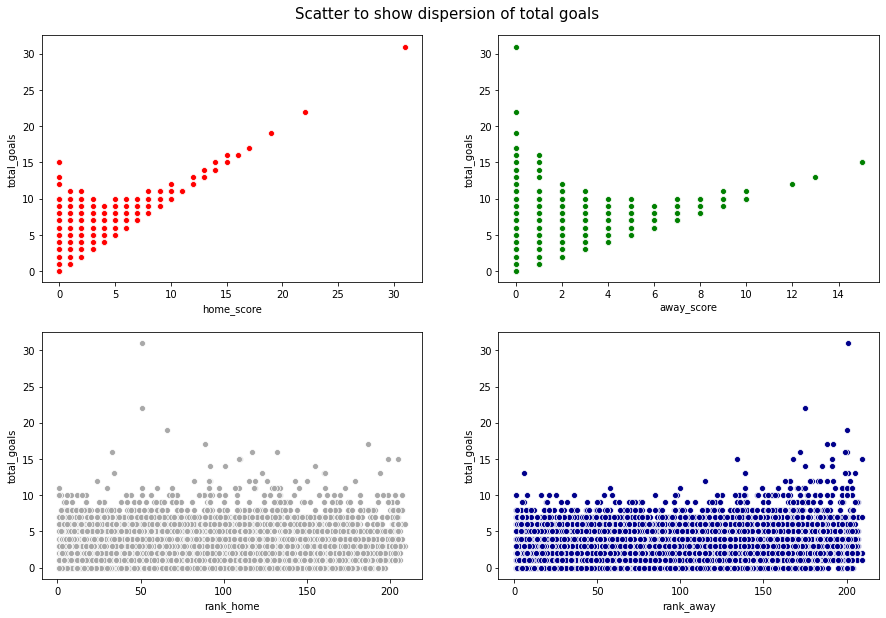

In [ ]:
# Plotting scatter plots to show dispersion of total goals

col_list = ['home_score', 'away_score', 'rank_home', 'rank_away']
colors = ['red', 'green', 'darkgrey', 'darkblue']

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Scatter to show dispersion of total goals', fontsize = 15, y = 0.92)
for ax, data, column, color in zip(axes.flatten(), complete_merged_df, col_list, colors):
  sns.scatterplot(complete_merged_df[column], complete_merged_df.total_goals, ax = ax, color = color)

### Histograms


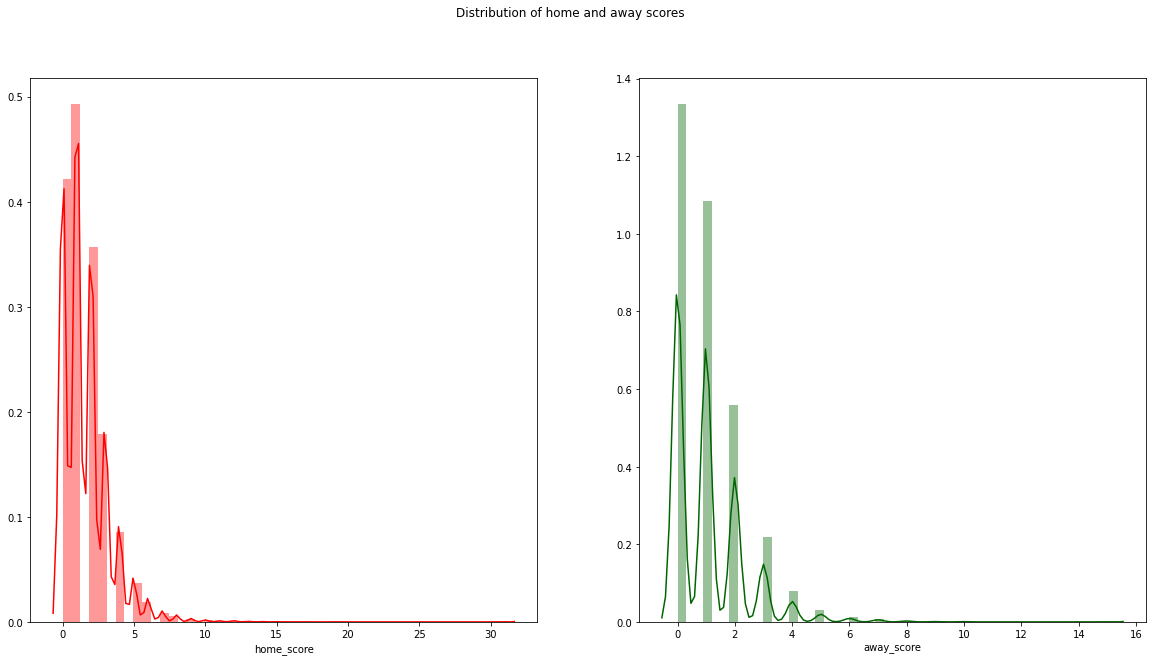

In [ ]:
# Using a distribution plot to plot home and away scores

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 10))
plt.suptitle('Distribution of home and away scores')
for ax, data, column, color in zip(axes.flatten(), complete_merged_df, ['home_score', 'away_score'], ['red', 'darkgreen']):
  sns.distplot(complete_merged_df[column], ax = ax, hist = True, color = color)

The plots are rightly skewed meaning that the mean is less than both the median and mode of goals scored

### Teams with most goals in all of the tournaments

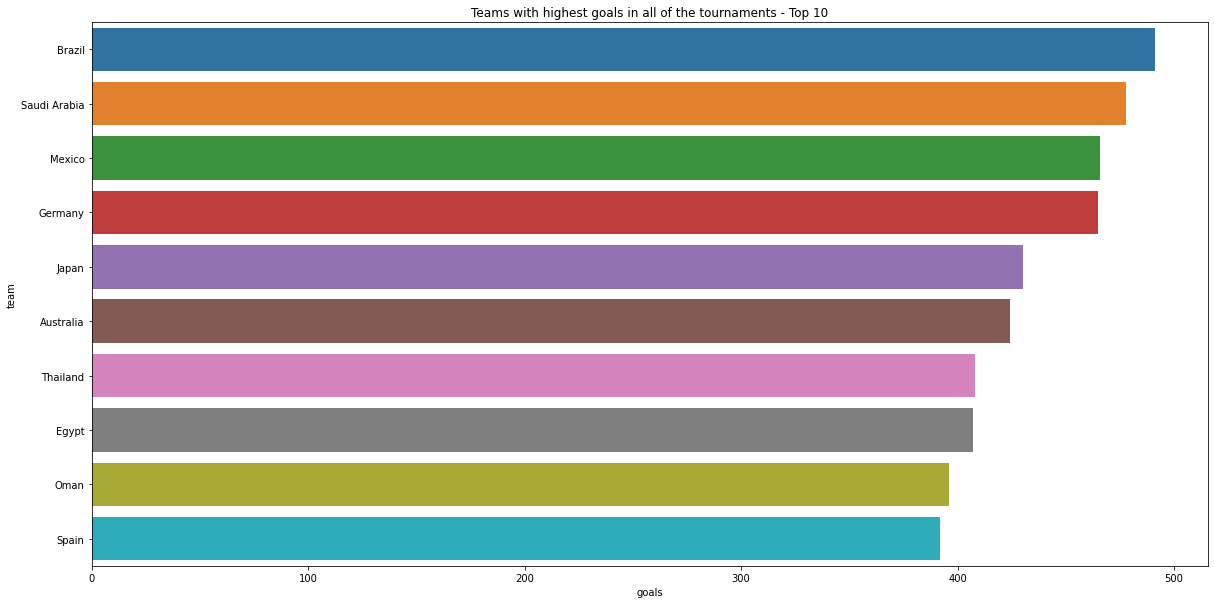

In [ ]:
# Creating a dataframe of home teams with their total goals scored

total_goals_home = complete_merged_df.groupby('home_team')['home_score'].sum().reset_index()
total_goals_home.columns = ['team', 'goals'] 

# Creating a dataframe of away teams with their total goals scored

total_goals_away = complete_merged_df.groupby('away_team')['away_score'].sum().reset_index()
total_goals_away.columns = ['team', 'goals'] 

# Concating the two dataframes together and then grouping dataframes by team to find total goals scored

total_goals = pd.concat([total_goals_home, total_goals_away])
total_golas = total_goals.sort_values(by = 'goals', ascending = False, inplace = True) 

# Changing the datatype of the goals column to integer
total_goals.goals = total_goals.goals.astype(int)

plt.figure(figsize=(20,10)) 
ax = sns.barplot("goals","team",data=total_goals[:10])

plt.title("Teams with highest goals in all of the tournaments - Top 10")
plt.show()

From the above barchart it can be deduced that, Brazil scored the highest number of goals followed closely by Saudi Arabia in all tournaments that the team participated

### Most goals scored during a match

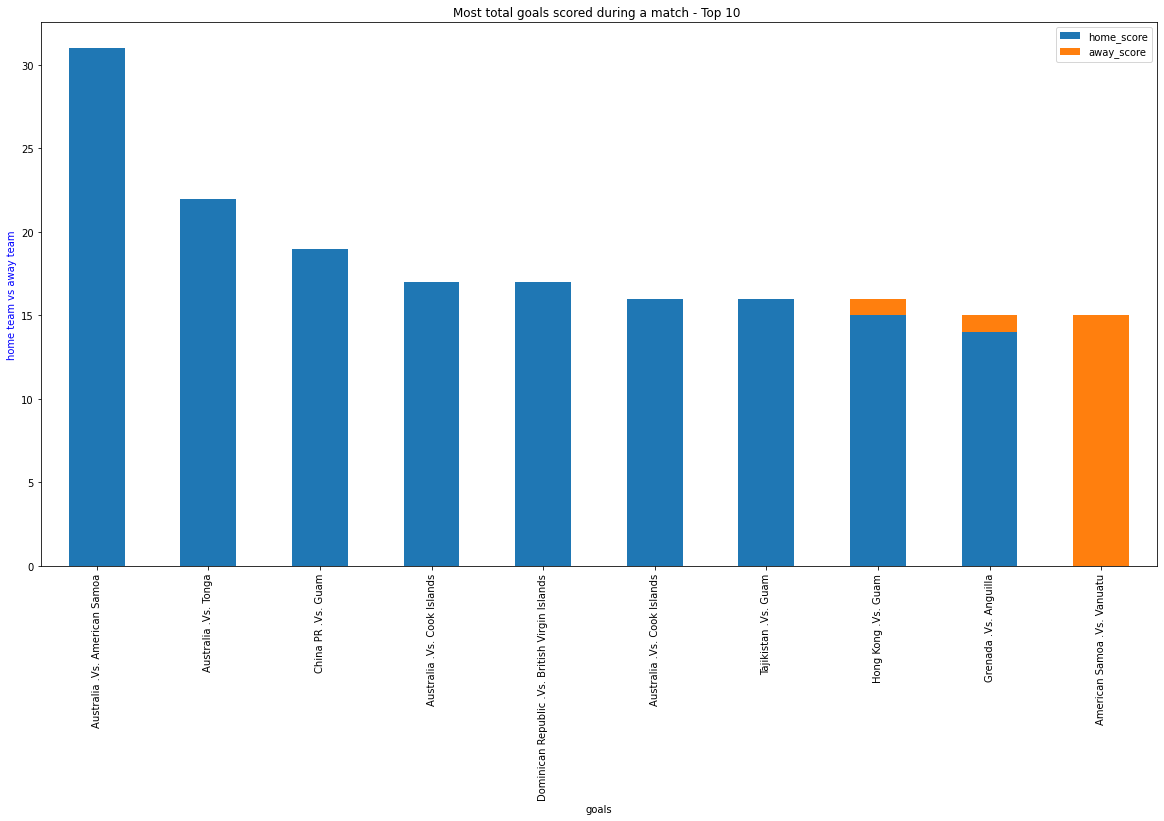

In [ ]:
# Creating a dataframe of total goals scored and then sorting the dataframe by total goals

most_goals = complete_merged_df.sort_values(by = 'total_goals', ascending = False)[:10][['date_x', 'home_team', 'away_team', 'home_score', 'away_score', 'total_goals']]

# Creating the y axis label

most_goals['match'] = most_goals[['home_team', 'away_team']].apply(lambda x: ' .Vs. '.join(x), axis = 1)
most_goals.index = most_goals.match

most_goals = most_goals.sort_values(by = 'total_goals', ascending = False) 

# Plotting a barchart

ax = most_goals[['home_score', 'away_score']].plot(kind="bar",stacked=True, figsize=(20,10),linewidth=2)


plt.ylabel("home team vs away team",color="b") 
plt.xlabel("goals")
plt.title("Most total goals scored during a match - Top 10 ") 

# Displaying the chart
plt.show()

The match with the highest number of goals scored from the above chart is Australia Vs American Samoa

### Total goals scored during games by year

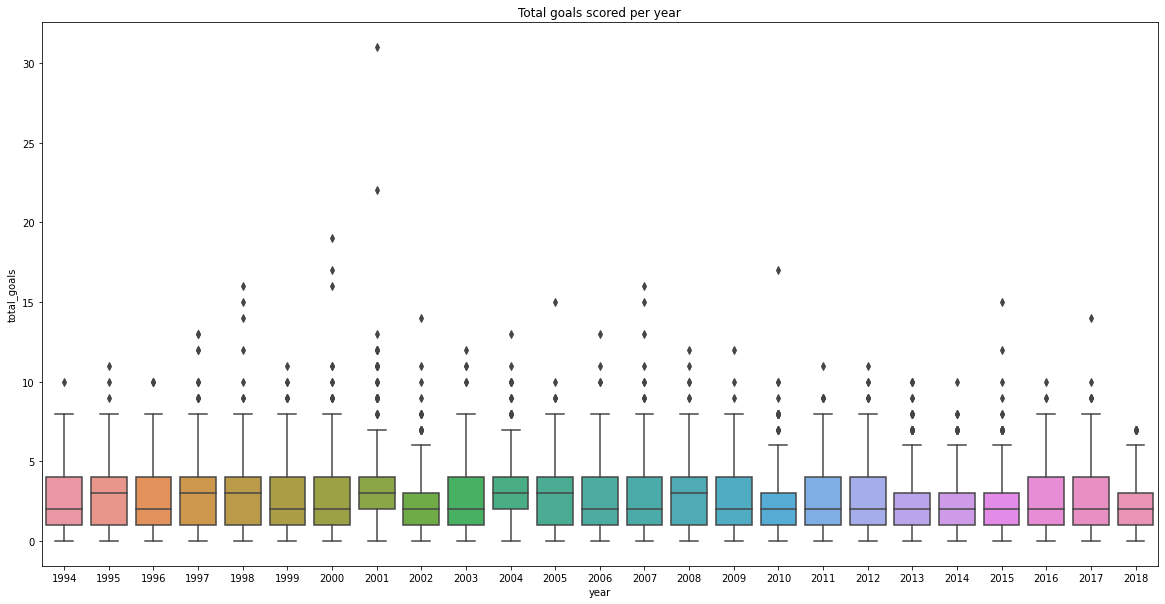

In [ ]:
# Plotting boxplots of year against total goals scored

plt.figure(figsize=(20,10))  
ax = sns.boxplot(y=complete_merged_df.total_goals,x=complete_merged_df.year) 

plt.title("Total goals scored per year")
plt.show()

The year 2001 had the highest number of total goals scored, and the year 2018 had the least number of goals scored

### Average goals per year

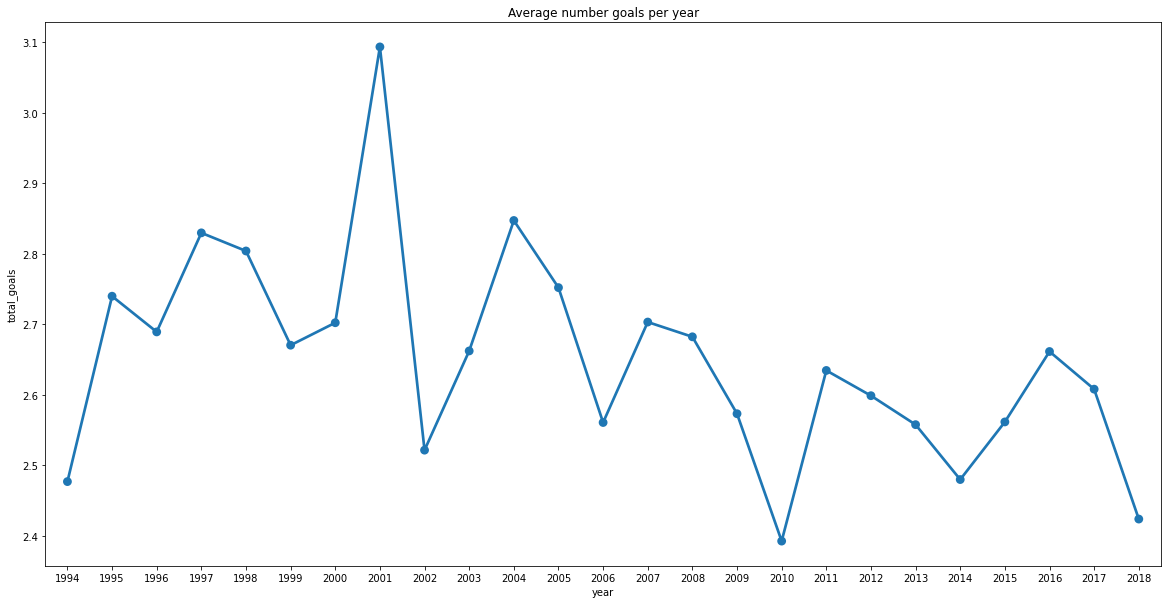

In [ ]:
# Creating a dataframe of year and total goals
#
goals = complete_merged_df.groupby('year')['total_goals'].mean().reset_index()
goals.year = goals.year.astype(int) # Changing the datatype of the year column to int

# Plotting a pointplot to show the trend of average goals scored across the years

plt.figure(figsize=(20,10))
ax = sns.pointplot(goals.year,goals.total_goals) 
plt.title("Average number goals per year") 
plt.show()

The number of goals has been reducing from 2001 towards the later years of 2018 as seen above

## Approach 1: Using Polynomial regression.
Create a model that can predict how many goals the home team scores

### *Predicting home score*

In [ ]:
# Creating the pred_home_df dataset
#
pred_home_df = complete_merged_df[['home_team',	'away_team',	'home_score',	'away_score',	'tournament', 'rank_home', 'rank_away']]

# Previewing the pred_home_df
#
pred_home_df.head()

,home_team,away_team,home_score,away_score,tournament,rank_home,rank_away
0,Barbados,Grenada,0,0,Friendly,99.0,131.0
1,Barbados,Grenada,0,0,Friendly,99.0,131.0
2,Ghana,Egypt,2,1,Friendly,29.0,24.0
3,Mali,Burkina Faso,1,1,Friendly,48.0,101.0
4,Mauritania,Mali,1,3,Friendly,147.0,48.0


#### Checking for multicollinearity


In [ ]:
# Displaying the correlations between the variables
#
corrs = pred_home_df.drop('home_score', axis = 1).corr()
corrs

,away_score,rank_home,rank_away
away_score,1.000000,0.213023,-0.184574
rank_home,0.213023,1.000000,0.481889
rank_away,-0.184574,0.481889,1.000000


In [ ]:
# Creating a dataframe of the VIF
#
vif_df = pd.DataFrame(np.linalg.inv(corrs.values), index = corrs.index, columns = corrs.columns)
vif_df

,away_score,rank_home,rank_away
away_score,1.180402,-0.464249,0.441589
rank_home,-0.464249,1.485040,-0.801313
rank_away,0.441589,-0.801313,1.467650


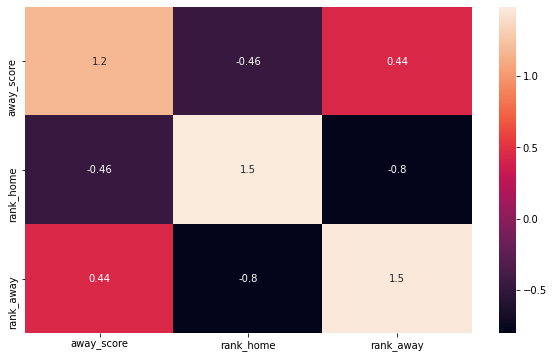

In [ ]:
# Creating a heatmap of the vif_df
#
plt.figure(figsize = (10, 6))
sns.heatmap(vif_df, annot = True)
plt.show()

All of the scores are under 5, therefore there is no multicollinearity

#### Creating the polynomial model

In [ ]:
# Creating X and y variables

X = pred_home_df.iloc[:, [0, 1, 3, 4, 5, 6]]
y = pred_home_df.home_score

# Encoding categorical variables

X = pd.get_dummies(X, drop_first=True)

# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Standardising the X_train and the X_test to the same scale

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting the polynomial features to the X_train and X_test

poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

# Training the model

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Making predictions

y_pred = regressor.predict(X_test)

# Measuring the accuracy of the model

print(np.sqrt(mean_squared_error(y_test, y_pred)))

1.3278064476746914


This model is fairly good in making predictions beacasue of its low RMSE

#### Hyperparameter tuning to find the optimal parameters for the model

In [ ]:
# Tuning the parameters of the linear regression model to find the optimal 

from sklearn.linear_model import LinearRegression
LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Creating a parameters dictionary

params = {'normalize': [True, False],
         'fit_intercept': [True, False]}

# Creating a cross validation of 10 folds

kfold = KFold(n_splits = 10)

# Using grid search to find the optimal parameters

grid_search = GridSearchCV(estimator=regressor, param_grid = params, cv = kfold, scoring = 'neg_mean_squared_error')

# Fitting the grid search 

grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score

print('Best score is',{grid_search.best_score_})

print('Best parameters are',grid_search.best_params_)

Best score is {-1.8751779365911763}
Best parameters are {'fit_intercept': True, 'normalize': False}


The optimal parameters for this model are 'fit_intercept': True, 'normalize': False

#### Performing cross validation to check for overfitting or underfitting

In [ ]:
# Performing cross validation of ten folds

scores = cross_val_score(regressor, X, y, scoring = 'neg_mean_squared_error', cv = 10)

# Calculating the mean of the cross validation scores

print('Mean of cross validation scores is',{np.round(scores.mean()*-1, 3)})

# Calculating the variance of the cross validation scores from the mean

print('Standard deviation of the cross validation scores is',{np.round(scores.std(), 3)})

Mean of cross validation scores is {1.875}
Standard deviation of the cross validation scores is {0.241}


The model is stable, it differs by 0.24, from the mean

#### Checking the model's appropriateness using a residual plot


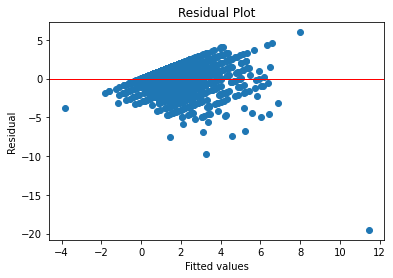

In [ ]:
# Plotting the residual plot

residual_values = np.subtract(y_pred, y_test)

# Plotting the residual scatterplot

plt.scatter(y_pred, residual_values)
plt.title('Residual Plot')
plt.ylabel('Residual')
plt.xlabel('Fitted values')
plt.axhline(y= residual_values.mean(), color='red', linewidth=1)
plt.show()

The model is fairly okay as the residuals are centered around the mean which is very close to 0

#### Heteroskedasticity test using the barlett's test

In [ ]:
# Performing the barlett's test

test_result, p_value = sp.stats.bartlett(y_pred, residual_values)

# Calculating the critical value of the chi squared distribution, to compare it with the test_result

degrees_of_freedom = len(y_pred) - 1
probability =  1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degrees_of_freedom)

# If the test_result is greater than the critical value, then the null hypothesis is rejected. 
# This means that there are patterns to the variance of the data which is heterogenous.

# If there no patterns identified, the null hypothesis is accepted. 
# This means that the variance is homogeneous 

if (test_result > critical_value):
  print('The test result of',{np.round(test_result,2)}, 'is greater than the critical value')
  print('Thefore the variances are unequal, which means that the model should be reassessed')
  print('The variances are heterogenous')
else:
  print('The test result of',{np.round(test_result,2)},'is less than the critical value')
  print('Thefore the variances are equal, which means that the model is good and does not require reassesment.')
  print('The variances are homogeneous')

The test result of {521.82} is less than the critical value
Thefore the variances are equal, which means that the model is good and does not require reassesment.
The variances are homogeneous


## Approach 2: Using Logistic Regression.
Create a model that can predict whether the home team will win, draw or lose

In [ ]:
# Selecting the relevant features for the logistic regression model

log_reg_df = complete_merged_df[['home_team', 'away_team', 'home_score', 'away_score', 'tournament', 'year', 'rank_home', 'rank_away', 'result']]

# Previewing the first five rows of the data

log_reg_df.head()

,home_team,away_team,home_score,away_score,tournament,year,rank_home,rank_away,result
0,Barbados,Grenada,0,0,Friendly,1994,99.0,131.0,Draw
1,Barbados,Grenada,0,0,Friendly,1994,99.0,131.0,Draw
2,Ghana,Egypt,2,1,Friendly,1994,29.0,24.0,Win
3,Mali,Burkina Faso,1,1,Friendly,1994,48.0,101.0,Draw
4,Mauritania,Mali,1,3,Friendly,1994,147.0,48.0,Lose


The results are fairly balanced as observed above

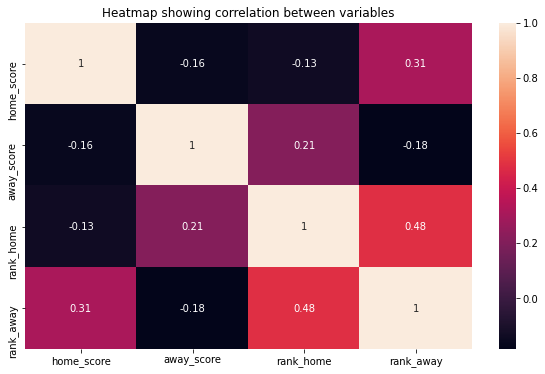

In [ ]:
# Checking for correlations between features

plt.figure(figsize = (10, 6))
sns.heatmap(log_reg_df.corr(), annot = True) 
plt.title('Heatmap showing correlation between variables')
plt.show()

#### Creating a LogisticRegression model

In [ ]:
# Spliting the data into features and the target variable

X = log_reg_df.drop('result', axis = 1)
y = log_reg_df.result

# Encoding the categorical features

X = pd.get_dummies(X, drop_first=True)

# Spliting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Instantiating the model and training the model

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

# Making predictions

y_pred = logistic.predict(X_test)

# Measuring the accuracy of the model

print('The accuracy of the model is',{accuracy_score(y_test, y_pred)})
print('The f1 score of the model is',{f1_score(y_test, y_pred, average = "macro")})
confusion_matrix(y_test, y_pred)

The accuracy of the model is {1.0}
The f1 score of the model is {1.0}


array([[1123,    0,    0],
       [   0, 1310,    0],
       [   0,    0, 2250]])

The model above is approximately 100% accurate and an f1_score of approximately 1.
The model is overfitting the training data thus more assessment is needed

#### Hyperparameter tuning

In [ ]:
# Displaying parameters of the logistic regression model that can be tuned

LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
params = {'C': [1.0, 5.0],
         'penalty': ['l1', 'l2']}

logistic = LogisticRegression()

In [ ]:
# Creating a cross validation of 10 folds

kfold = KFold(n_splits = 10)

# Using grid search to find the optimal parameters
grid_search = GridSearchCV(estimator=logistic, param_grid = params, cv = kfold, scoring = 'accuracy')

In [ ]:
# Fitting the grid search 
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
print('Best score is',{grid_search.best_score_})
print('The best parameters are',grid_search.best_params_)

Best score is {1.0}
The best parameters are {'C': 1.0, 'penalty': 'l2'}


The best parameters are {'C': 1.0, 'penalty': '12'} which give a score of 1

## Challenging the solution

## Conclusion